In [25]:
import tensorflow as tf

from tensorflow.python.keras.utils.vis_utils import plot_model

import pydot

from tensorflow.keras.models import Model

In [19]:
def seq_model():
    seq_mod = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                         tf.keras.layers.Dense(128, activation= tf.nn.relu),
                                         tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                                         ])
    return seq_mod

In [11]:
def func_model():
    input_layer = tf.keras.Input(shape= (28,28))
    
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    
    first_dense = tf.keras.layers.Dense(128,activation = tf.nn.relu)(flatten_layer)
    second_dense = tf.keras.layers.Dense(128, activation = tf.nn.softmax)(first_dense)
    
    mod = Model(inputs = input_layer, outputs = second_dense)
    
    return mod

In [12]:
modl = func_model()

In [20]:
modl_seq = seq_model()

In [17]:

modl.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
Total params: 116,992
Trainable params: 116,992
Non-trainable params: 0
_________________________________________________________________


In [21]:
modl_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
plot_model(modl, show_shapes=True, show_layer_names=True, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [27]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 1s 0us/step


In [29]:
# configure, train, and evaluate the model
modl.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modl.fit(training_images, training_labels, epochs=2)
modl.evaluate(test_images, test_labels)

Epoch 1/2
1875/1875 [==============================] - 2s 890us/step - loss: 0.5335 - accuracy: 0.8169
Epoch 2/2
313/313 [==============================] - 0s 486us/step - loss: 0.4070 - accuracy: 0.8538


[0.407044380903244, 0.8537999987602234]

## Multi-output Model

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [31]:
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [32]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

In [33]:
# Use pandas excel reader
df = pd.read_excel(URL)

In [34]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [35]:
df.shape

(768, 10)

### Now sampling a small amount of data as the goal is not actully creating actual model but how this things work 

In [36]:
df = df.sample(frac=0.1).reset_index(drop =True )

In [37]:
train, test = train_test_split(df, test_size = 0.2)

In [39]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
18,0.74,686.0,245.0,220.5,3.5,2,0.25,1,12.43,15.19
32,0.79,637.0,343.0,147.0,7.0,4,0.40,3,42.49,38.81
45,0.62,808.5,367.5,220.5,3.5,3,0.25,4,14.61,15.56
51,0.62,808.5,367.5,220.5,3.5,4,0.10,5,12.80,13.99
5,0.71,710.5,269.5,220.5,3.5,3,0.40,2,14.66,17.37


In [43]:
train_stats = train.describe()

In [44]:
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.753934,681.581967,310.065574,185.758197,4.877049,3.590164,0.216393,3.065574,19.660492,21.841967
std,0.107816,89.852805,39.728608,44.572739,1.723987,1.131033,0.129975,1.662015,9.377109,8.770438
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.040000,10.900000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000,12.670000,14.970000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,15.230000,17.850000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,5.000000,0.250000,5.000000,26.460000,27.340000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.490000,47.010000


In [ ]:
train_stats.pop('Y1')

In [48]:
train_stats.pop('Y2')

count    61.000000
mean     21.841967
std       8.770438
min      10.900000
25%      14.970000
50%      17.850000
75%      27.340000
max      47.010000
Name: Y2, dtype: float64

In [51]:
train_stats = train_stats.transpose()

In [52]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

In [53]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [54]:
train_Y = format_output(train)
test_Y = format_output(test)

In [55]:
norm_train_X = norm(train)
norm_test_X = norm(test)

### model

In [60]:
input_model = Input(shape =(len(train.columns),))
first_layer = Dense(units='128', activation ='relu')(input_model)

second_layer = Dense(units='128', activation ='relu')(first_layer)



#first_output
y1 = Dense(units='1', name = 'y1')(second_layer)

#before second output another layer is added
third_layer = Dense(units = '64', activation = 'relu')(second_layer)
#second output

y2 = Dense(units='1', name='y2')(third_layer)


model = Model(inputs = input_model, outputs = [y1, y2])

In [61]:
print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 128)          1152        input_6[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 128)          16512       dense_17[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 64)           8256        dense_18[0][0]                   
_______________________________________________________________________________________

In [64]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1': 'mse', 'y2': 'mse'},
              metrics={'y1': tf.keras.metrics.RootMeanSquaredError(),
                       'y2': tf.keras.metrics.RootMeanSquaredError()})

In [65]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
7/7 [==============================] - 0s 13ms/step - loss: 963.7947 - y1_loss: 451.5571 - y2_loss: 512.2377 - y1_root_mean_squared_error: 21.2499 - y2_root_mean_squared_error: 22.6327 - val_loss: 818.3152 - val_y1_loss: 411.7479 - val_y2_loss: 406.5672 - val_y1_root_mean_squared_error: 20.2916 - val_y2_root_mean_squared_error: 20.1635
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 450.6280 - y1_loss: 271.3432 - y2_loss: 179.2847 - y1_root_mean_squared_error: 16.4725 - y2_root_mean_squared_error: 13.3897 - val_loss: 135.7828 - val_y1_loss: 85.4278 - val_y2_loss: 50.3549 - val_y1_root_mean_squared_error: 9.2427 - val_y2_root_mean_squared_error: 7.0961
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 105.5974 - y1_loss: 62.0584 - y2_loss: 43.5390 - y1_root_mean_squared_error: 7.8777 - y2_root_mean_squared_error: 6.5984 - val_loss: 403.5345 - val_y1_loss: 111.4903 - val_y2_loss: 292.0443 - val_y1_root_mean_squared_error: 10.5589 - 

7/7 [==============================] - 0s 2ms/step - loss: 14.8286 - y1_loss: 5.8287 - y2_loss: 8.9999 - y1_root_mean_squared_error: 2.4143 - y2_root_mean_squared_error: 3.0000 - val_loss: 30.4327 - val_y1_loss: 12.5333 - val_y2_loss: 17.8994 - val_y1_root_mean_squared_error: 3.5402 - val_y2_root_mean_squared_error: 4.2308
Epoch 26/500
7/7 [==============================] - 0s 2ms/step - loss: 19.8226 - y1_loss: 7.6479 - y2_loss: 12.1747 - y1_root_mean_squared_error: 2.7655 - y2_root_mean_squared_error: 3.4892 - val_loss: 11.5962 - val_y1_loss: 3.5110 - val_y2_loss: 8.0851 - val_y1_root_mean_squared_error: 1.8738 - val_y2_root_mean_squared_error: 2.8434
Epoch 27/500
7/7 [==============================] - 0s 3ms/step - loss: 18.0438 - y1_loss: 6.3803 - y2_loss: 11.6635 - y1_root_mean_squared_error: 2.5259 - y2_root_mean_squared_error: 3.4152 - val_loss: 16.6517 - val_y1_loss: 3.1774 - val_y2_loss: 13.4743 - val_y1_root_mean_squared_error: 1.7825 - val_y2_root_mean_squared_error: 3.6707


7/7 [==============================] - 0s 3ms/step - loss: 10.6260 - y1_loss: 3.8463 - y2_loss: 6.7798 - y1_root_mean_squared_error: 1.9612 - y2_root_mean_squared_error: 2.6038 - val_loss: 29.0078 - val_y1_loss: 6.4569 - val_y2_loss: 22.5509 - val_y1_root_mean_squared_error: 2.5411 - val_y2_root_mean_squared_error: 4.7488
Epoch 50/500
7/7 [==============================] - 0s 2ms/step - loss: 16.0217 - y1_loss: 4.5020 - y2_loss: 11.5197 - y1_root_mean_squared_error: 2.1218 - y2_root_mean_squared_error: 3.3941 - val_loss: 7.1821 - val_y1_loss: 2.0325 - val_y2_loss: 5.1496 - val_y1_root_mean_squared_error: 1.4257 - val_y2_root_mean_squared_error: 2.2693
Epoch 51/500
7/7 [==============================] - 0s 2ms/step - loss: 11.6994 - y1_loss: 3.8345 - y2_loss: 7.8649 - y1_root_mean_squared_error: 1.9582 - y2_root_mean_squared_error: 2.8044 - val_loss: 7.4621 - val_y1_loss: 2.2467 - val_y2_loss: 5.2154 - val_y1_root_mean_squared_error: 1.4989 - val_y2_root_mean_squared_error: 2.2837
Epoch

7/7 [==============================] - 0s 2ms/step - loss: 11.0205 - y1_loss: 3.7253 - y2_loss: 7.2952 - y1_root_mean_squared_error: 1.9301 - y2_root_mean_squared_error: 2.7010 - val_loss: 9.0745 - val_y1_loss: 1.9666 - val_y2_loss: 7.1079 - val_y1_root_mean_squared_error: 1.4024 - val_y2_root_mean_squared_error: 2.6661
Epoch 74/500
7/7 [==============================] - 0s 2ms/step - loss: 9.5417 - y1_loss: 3.2012 - y2_loss: 6.3405 - y1_root_mean_squared_error: 1.7892 - y2_root_mean_squared_error: 2.5180 - val_loss: 24.8317 - val_y1_loss: 6.1355 - val_y2_loss: 18.6962 - val_y1_root_mean_squared_error: 2.4770 - val_y2_root_mean_squared_error: 4.3239
Epoch 75/500
7/7 [==============================] - 0s 2ms/step - loss: 11.1435 - y1_loss: 4.2556 - y2_loss: 6.8880 - y1_root_mean_squared_error: 2.0629 - y2_root_mean_squared_error: 2.6245 - val_loss: 83.9393 - val_y1_loss: 18.6253 - val_y2_loss: 65.3139 - val_y1_root_mean_squared_error: 4.3157 - val_y2_root_mean_squared_error: 8.0817
Epoc

7/7 [==============================] - 0s 2ms/step - loss: 10.7948 - y1_loss: 3.0585 - y2_loss: 7.7363 - y1_root_mean_squared_error: 1.7488 - y2_root_mean_squared_error: 2.7814 - val_loss: 6.4478 - val_y1_loss: 1.9284 - val_y2_loss: 4.5194 - val_y1_root_mean_squared_error: 1.3887 - val_y2_root_mean_squared_error: 2.1259
Epoch 98/500
7/7 [==============================] - 0s 2ms/step - loss: 7.4568 - y1_loss: 2.7737 - y2_loss: 4.6831 - y1_root_mean_squared_error: 1.6655 - y2_root_mean_squared_error: 2.1640 - val_loss: 6.4655 - val_y1_loss: 2.0197 - val_y2_loss: 4.4457 - val_y1_root_mean_squared_error: 1.4212 - val_y2_root_mean_squared_error: 2.1085
Epoch 99/500
7/7 [==============================] - 0s 2ms/step - loss: 8.0102 - y1_loss: 2.7147 - y2_loss: 5.2955 - y1_root_mean_squared_error: 1.6476 - y2_root_mean_squared_error: 2.3012 - val_loss: 25.5889 - val_y1_loss: 10.3784 - val_y2_loss: 15.2105 - val_y1_root_mean_squared_error: 3.2215 - val_y2_root_mean_squared_error: 3.9001
Epoch 1

7/7 [==============================] - 0s 2ms/step - loss: 6.9170 - y1_loss: 2.7316 - y2_loss: 4.1854 - y1_root_mean_squared_error: 1.6528 - y2_root_mean_squared_error: 2.0458 - val_loss: 5.6544 - val_y1_loss: 1.8846 - val_y2_loss: 3.7697 - val_y1_root_mean_squared_error: 1.3728 - val_y2_root_mean_squared_error: 1.9416
Epoch 122/500
7/7 [==============================] - 0s 2ms/step - loss: 5.9608 - y1_loss: 2.3731 - y2_loss: 3.5877 - y1_root_mean_squared_error: 1.5405 - y2_root_mean_squared_error: 1.8941 - val_loss: 6.3683 - val_y1_loss: 2.7434 - val_y2_loss: 3.6249 - val_y1_root_mean_squared_error: 1.6563 - val_y2_root_mean_squared_error: 1.9039
Epoch 123/500
7/7 [==============================] - 0s 2ms/step - loss: 7.7187 - y1_loss: 2.2792 - y2_loss: 5.4395 - y1_root_mean_squared_error: 1.5097 - y2_root_mean_squared_error: 2.3323 - val_loss: 6.1096 - val_y1_loss: 1.7115 - val_y2_loss: 4.3981 - val_y1_root_mean_squared_error: 1.3082 - val_y2_root_mean_squared_error: 2.0972
Epoch 124

7/7 [==============================] - 0s 2ms/step - loss: 6.9940 - y1_loss: 2.1062 - y2_loss: 4.8878 - y1_root_mean_squared_error: 1.4513 - y2_root_mean_squared_error: 2.2108 - val_loss: 20.8724 - val_y1_loss: 9.1969 - val_y2_loss: 11.6755 - val_y1_root_mean_squared_error: 3.0326 - val_y2_root_mean_squared_error: 3.4169
Epoch 146/500
7/7 [==============================] - 0s 3ms/step - loss: 5.8987 - y1_loss: 2.6084 - y2_loss: 3.2903 - y1_root_mean_squared_error: 1.6151 - y2_root_mean_squared_error: 1.8139 - val_loss: 39.0712 - val_y1_loss: 12.2306 - val_y2_loss: 26.8406 - val_y1_root_mean_squared_error: 3.4972 - val_y2_root_mean_squared_error: 5.1808
Epoch 147/500
7/7 [==============================] - 0s 3ms/step - loss: 10.6907 - y1_loss: 3.1337 - y2_loss: 7.5570 - y1_root_mean_squared_error: 1.7702 - y2_root_mean_squared_error: 2.7490 - val_loss: 6.4574 - val_y1_loss: 2.8919 - val_y2_loss: 3.5654 - val_y1_root_mean_squared_error: 1.7006 - val_y2_root_mean_squared_error: 1.8882
Epo

7/7 [==============================] - 0s 2ms/step - loss: 6.0780 - y1_loss: 2.2111 - y2_loss: 3.8669 - y1_root_mean_squared_error: 1.4870 - y2_root_mean_squared_error: 1.9665 - val_loss: 5.8280 - val_y1_loss: 2.1100 - val_y2_loss: 3.7181 - val_y1_root_mean_squared_error: 1.4526 - val_y2_root_mean_squared_error: 1.9282
Epoch 170/500
7/7 [==============================] - 0s 2ms/step - loss: 5.0838 - y1_loss: 1.7575 - y2_loss: 3.3263 - y1_root_mean_squared_error: 1.3257 - y2_root_mean_squared_error: 1.8238 - val_loss: 5.8428 - val_y1_loss: 2.1438 - val_y2_loss: 3.6990 - val_y1_root_mean_squared_error: 1.4642 - val_y2_root_mean_squared_error: 1.9233
Epoch 171/500
7/7 [==============================] - 0s 2ms/step - loss: 5.6984 - y1_loss: 1.7884 - y2_loss: 3.9100 - y1_root_mean_squared_error: 1.3373 - y2_root_mean_squared_error: 1.9774 - val_loss: 6.5909 - val_y1_loss: 2.8272 - val_y2_loss: 3.7637 - val_y1_root_mean_squared_error: 1.6814 - val_y2_root_mean_squared_error: 1.9400
Epoch 172

7/7 [==============================] - 0s 2ms/step - loss: 4.8232 - y1_loss: 1.7127 - y2_loss: 3.1105 - y1_root_mean_squared_error: 1.3087 - y2_root_mean_squared_error: 1.7637 - val_loss: 31.8851 - val_y1_loss: 13.4793 - val_y2_loss: 18.4058 - val_y1_root_mean_squared_error: 3.6714 - val_y2_root_mean_squared_error: 4.2902
Epoch 194/500
7/7 [==============================] - 0s 2ms/step - loss: 10.8456 - y1_loss: 2.8282 - y2_loss: 8.0174 - y1_root_mean_squared_error: 1.6817 - y2_root_mean_squared_error: 2.8315 - val_loss: 12.2668 - val_y1_loss: 4.1056 - val_y2_loss: 8.1612 - val_y1_root_mean_squared_error: 2.0262 - val_y2_root_mean_squared_error: 2.8568
Epoch 195/500
7/7 [==============================] - 0s 2ms/step - loss: 4.5643 - y1_loss: 2.0028 - y2_loss: 2.5615 - y1_root_mean_squared_error: 1.4152 - y2_root_mean_squared_error: 1.6005 - val_loss: 8.1232 - val_y1_loss: 4.4022 - val_y2_loss: 3.7210 - val_y1_root_mean_squared_error: 2.0981 - val_y2_root_mean_squared_error: 1.9290
Epoc

7/7 [==============================] - 0s 2ms/step - loss: 3.3086 - y1_loss: 1.2558 - y2_loss: 2.0528 - y1_root_mean_squared_error: 1.1206 - y2_root_mean_squared_error: 1.4328 - val_loss: 212.7719 - val_y1_loss: 39.4259 - val_y2_loss: 173.3461 - val_y1_root_mean_squared_error: 6.2790 - val_y2_root_mean_squared_error: 13.1661
Epoch 218/500
7/7 [==============================] - 0s 2ms/step - loss: 41.3995 - y1_loss: 9.5067 - y2_loss: 31.8928 - y1_root_mean_squared_error: 3.0833 - y2_root_mean_squared_error: 5.6474 - val_loss: 7.5126 - val_y1_loss: 2.8153 - val_y2_loss: 4.6974 - val_y1_root_mean_squared_error: 1.6779 - val_y2_root_mean_squared_error: 2.1673
Epoch 219/500
7/7 [==============================] - 0s 2ms/step - loss: 4.3509 - y1_loss: 1.6942 - y2_loss: 2.6567 - y1_root_mean_squared_error: 1.3016 - y2_root_mean_squared_error: 1.6299 - val_loss: 7.4153 - val_y1_loss: 2.5972 - val_y2_loss: 4.8181 - val_y1_root_mean_squared_error: 1.6116 - val_y2_root_mean_squared_error: 2.1950
E

7/7 [==============================] - 0s 3ms/step - loss: 3.6015 - y1_loss: 1.3935 - y2_loss: 2.2080 - y1_root_mean_squared_error: 1.1805 - y2_root_mean_squared_error: 1.4859 - val_loss: 5.1470 - val_y1_loss: 1.9764 - val_y2_loss: 3.1706 - val_y1_root_mean_squared_error: 1.4058 - val_y2_root_mean_squared_error: 1.7806
Epoch 242/500
7/7 [==============================] - 0s 3ms/step - loss: 4.0568 - y1_loss: 1.5862 - y2_loss: 2.4706 - y1_root_mean_squared_error: 1.2595 - y2_root_mean_squared_error: 1.5718 - val_loss: 6.2838 - val_y1_loss: 2.0386 - val_y2_loss: 4.2452 - val_y1_root_mean_squared_error: 1.4278 - val_y2_root_mean_squared_error: 2.0604
Epoch 243/500
7/7 [==============================] - 0s 3ms/step - loss: 2.9560 - y1_loss: 1.2628 - y2_loss: 1.6932 - y1_root_mean_squared_error: 1.1238 - y2_root_mean_squared_error: 1.3012 - val_loss: 5.4864 - val_y1_loss: 2.1951 - val_y2_loss: 3.2913 - val_y1_root_mean_squared_error: 1.4816 - val_y2_root_mean_squared_error: 1.8142
Epoch 244

7/7 [==============================] - 0s 2ms/step - loss: 2.4119 - y1_loss: 1.0743 - y2_loss: 1.3376 - y1_root_mean_squared_error: 1.0365 - y2_root_mean_squared_error: 1.1566 - val_loss: 40.4427 - val_y1_loss: 11.6070 - val_y2_loss: 28.8356 - val_y1_root_mean_squared_error: 3.4069 - val_y2_root_mean_squared_error: 5.3699
Epoch 266/500
7/7 [==============================] - 0s 2ms/step - loss: 6.6281 - y1_loss: 2.2063 - y2_loss: 4.4218 - y1_root_mean_squared_error: 1.4854 - y2_root_mean_squared_error: 2.1028 - val_loss: 7.2358 - val_y1_loss: 3.2547 - val_y2_loss: 3.9811 - val_y1_root_mean_squared_error: 1.8041 - val_y2_root_mean_squared_error: 1.9953
Epoch 267/500
7/7 [==============================] - 0s 2ms/step - loss: 2.6155 - y1_loss: 1.2351 - y2_loss: 1.3804 - y1_root_mean_squared_error: 1.1114 - y2_root_mean_squared_error: 1.1749 - val_loss: 35.9972 - val_y1_loss: 13.9839 - val_y2_loss: 22.0133 - val_y1_root_mean_squared_error: 3.7395 - val_y2_root_mean_squared_error: 4.6918
Epo

7/7 [==============================] - 0s 2ms/step - loss: 5.3898 - y1_loss: 1.8093 - y2_loss: 3.5805 - y1_root_mean_squared_error: 1.3451 - y2_root_mean_squared_error: 1.8922 - val_loss: 8.2240 - val_y1_loss: 2.4670 - val_y2_loss: 5.7570 - val_y1_root_mean_squared_error: 1.5707 - val_y2_root_mean_squared_error: 2.3994
Epoch 290/500
7/7 [==============================] - 0s 2ms/step - loss: 2.3819 - y1_loss: 0.9796 - y2_loss: 1.4024 - y1_root_mean_squared_error: 0.9897 - y2_root_mean_squared_error: 1.1842 - val_loss: 5.9001 - val_y1_loss: 2.7693 - val_y2_loss: 3.1308 - val_y1_root_mean_squared_error: 1.6641 - val_y2_root_mean_squared_error: 1.7694
Epoch 291/500
7/7 [==============================] - 0s 2ms/step - loss: 2.3603 - y1_loss: 0.8644 - y2_loss: 1.4959 - y1_root_mean_squared_error: 0.9298 - y2_root_mean_squared_error: 1.2231 - val_loss: 5.6140 - val_y1_loss: 2.0551 - val_y2_loss: 3.5589 - val_y1_root_mean_squared_error: 1.4336 - val_y2_root_mean_squared_error: 1.8865
Epoch 292

7/7 [==============================] - 0s 2ms/step - loss: 2.1969 - y1_loss: 0.7392 - y2_loss: 1.4577 - y1_root_mean_squared_error: 0.8598 - y2_root_mean_squared_error: 1.2074 - val_loss: 14.5450 - val_y1_loss: 2.3777 - val_y2_loss: 12.1673 - val_y1_root_mean_squared_error: 1.5420 - val_y2_root_mean_squared_error: 3.4882
Epoch 314/500
7/7 [==============================] - 0s 2ms/step - loss: 3.1311 - y1_loss: 1.1081 - y2_loss: 2.0230 - y1_root_mean_squared_error: 1.0527 - y2_root_mean_squared_error: 1.4223 - val_loss: 6.1198 - val_y1_loss: 2.1102 - val_y2_loss: 4.0096 - val_y1_root_mean_squared_error: 1.4527 - val_y2_root_mean_squared_error: 2.0024
Epoch 315/500
7/7 [==============================] - 0s 2ms/step - loss: 2.9964 - y1_loss: 1.0791 - y2_loss: 1.9173 - y1_root_mean_squared_error: 1.0388 - y2_root_mean_squared_error: 1.3847 - val_loss: 22.2162 - val_y1_loss: 8.0156 - val_y2_loss: 14.2006 - val_y1_root_mean_squared_error: 2.8312 - val_y2_root_mean_squared_error: 3.7684
Epoch

7/7 [==============================] - 0s 3ms/step - loss: 1.7596 - y1_loss: 0.8120 - y2_loss: 0.9475 - y1_root_mean_squared_error: 0.9011 - y2_root_mean_squared_error: 0.9734 - val_loss: 15.0102 - val_y1_loss: 2.5922 - val_y2_loss: 12.4180 - val_y1_root_mean_squared_error: 1.6100 - val_y2_root_mean_squared_error: 3.5239
Epoch 338/500
7/7 [==============================] - 0s 3ms/step - loss: 3.7615 - y1_loss: 1.2914 - y2_loss: 2.4701 - y1_root_mean_squared_error: 1.1364 - y2_root_mean_squared_error: 1.5717 - val_loss: 5.7288 - val_y1_loss: 1.9275 - val_y2_loss: 3.8013 - val_y1_root_mean_squared_error: 1.3883 - val_y2_root_mean_squared_error: 1.9497
Epoch 339/500
7/7 [==============================] - 0s 3ms/step - loss: 1.6842 - y1_loss: 0.7372 - y2_loss: 0.9470 - y1_root_mean_squared_error: 0.8586 - y2_root_mean_squared_error: 0.9731 - val_loss: 30.5893 - val_y1_loss: 4.1383 - val_y2_loss: 26.4510 - val_y1_root_mean_squared_error: 2.0343 - val_y2_root_mean_squared_error: 5.1431
Epoch

7/7 [==============================] - 0s 2ms/step - loss: 1.6980 - y1_loss: 0.7355 - y2_loss: 0.9625 - y1_root_mean_squared_error: 0.8576 - y2_root_mean_squared_error: 0.9811 - val_loss: 6.5218 - val_y1_loss: 3.1984 - val_y2_loss: 3.3234 - val_y1_root_mean_squared_error: 1.7884 - val_y2_root_mean_squared_error: 1.8230
Epoch 362/500
7/7 [==============================] - 0s 3ms/step - loss: 1.3946 - y1_loss: 0.8054 - y2_loss: 0.5892 - y1_root_mean_squared_error: 0.8974 - y2_root_mean_squared_error: 0.7676 - val_loss: 8.2445 - val_y1_loss: 2.4566 - val_y2_loss: 5.7878 - val_y1_root_mean_squared_error: 1.5674 - val_y2_root_mean_squared_error: 2.4058
Epoch 363/500
7/7 [==============================] - 0s 2ms/step - loss: 2.6330 - y1_loss: 0.8655 - y2_loss: 1.7675 - y1_root_mean_squared_error: 0.9303 - y2_root_mean_squared_error: 1.3295 - val_loss: 7.2477 - val_y1_loss: 2.2551 - val_y2_loss: 4.9926 - val_y1_root_mean_squared_error: 1.5017 - val_y2_root_mean_squared_error: 2.2344
Epoch 364

7/7 [==============================] - 0s 2ms/step - loss: 1.2610 - y1_loss: 0.7335 - y2_loss: 0.5275 - y1_root_mean_squared_error: 0.8564 - y2_root_mean_squared_error: 0.7263 - val_loss: 5.7715 - val_y1_loss: 2.2180 - val_y2_loss: 3.5535 - val_y1_root_mean_squared_error: 1.4893 - val_y2_root_mean_squared_error: 1.8851
Epoch 386/500
7/7 [==============================] - 0s 2ms/step - loss: 1.0837 - y1_loss: 0.6404 - y2_loss: 0.4432 - y1_root_mean_squared_error: 0.8003 - y2_root_mean_squared_error: 0.6657 - val_loss: 9.1896 - val_y1_loss: 2.7168 - val_y2_loss: 6.4729 - val_y1_root_mean_squared_error: 1.6483 - val_y2_root_mean_squared_error: 2.5442
Epoch 387/500
7/7 [==============================] - 0s 2ms/step - loss: 1.4132 - y1_loss: 0.8003 - y2_loss: 0.6129 - y1_root_mean_squared_error: 0.8946 - y2_root_mean_squared_error: 0.7828 - val_loss: 5.2997 - val_y1_loss: 2.0463 - val_y2_loss: 3.2535 - val_y1_root_mean_squared_error: 1.4305 - val_y2_root_mean_squared_error: 1.8037
Epoch 388

7/7 [==============================] - 0s 2ms/step - loss: 1.2458 - y1_loss: 0.6142 - y2_loss: 0.6316 - y1_root_mean_squared_error: 0.7837 - y2_root_mean_squared_error: 0.7948 - val_loss: 6.1373 - val_y1_loss: 2.0149 - val_y2_loss: 4.1223 - val_y1_root_mean_squared_error: 1.4195 - val_y2_root_mean_squared_error: 2.0304
Epoch 410/500
7/7 [==============================] - 0s 2ms/step - loss: 1.1784 - y1_loss: 0.5385 - y2_loss: 0.6400 - y1_root_mean_squared_error: 0.7338 - y2_root_mean_squared_error: 0.8000 - val_loss: 6.1390 - val_y1_loss: 2.5657 - val_y2_loss: 3.5733 - val_y1_root_mean_squared_error: 1.6018 - val_y2_root_mean_squared_error: 1.8903
Epoch 411/500
7/7 [==============================] - 0s 3ms/step - loss: 1.3723 - y1_loss: 0.7394 - y2_loss: 0.6328 - y1_root_mean_squared_error: 0.8599 - y2_root_mean_squared_error: 0.7955 - val_loss: 5.5039 - val_y1_loss: 2.0567 - val_y2_loss: 3.4472 - val_y1_root_mean_squared_error: 1.4341 - val_y2_root_mean_squared_error: 1.8567
Epoch 412

7/7 [==============================] - 0s 3ms/step - loss: 1.7853 - y1_loss: 0.7779 - y2_loss: 1.0075 - y1_root_mean_squared_error: 0.8820 - y2_root_mean_squared_error: 1.0037 - val_loss: 6.2217 - val_y1_loss: 2.0539 - val_y2_loss: 4.1678 - val_y1_root_mean_squared_error: 1.4331 - val_y2_root_mean_squared_error: 2.0415
Epoch 434/500
7/7 [==============================] - 0s 3ms/step - loss: 0.9915 - y1_loss: 0.5316 - y2_loss: 0.4599 - y1_root_mean_squared_error: 0.7291 - y2_root_mean_squared_error: 0.6781 - val_loss: 8.8736 - val_y1_loss: 3.6127 - val_y2_loss: 5.2609 - val_y1_root_mean_squared_error: 1.9007 - val_y2_root_mean_squared_error: 2.2937
Epoch 435/500
7/7 [==============================] - 0s 3ms/step - loss: 1.6184 - y1_loss: 0.8024 - y2_loss: 0.8160 - y1_root_mean_squared_error: 0.8958 - y2_root_mean_squared_error: 0.9033 - val_loss: 6.3923 - val_y1_loss: 2.0943 - val_y2_loss: 4.2980 - val_y1_root_mean_squared_error: 1.4472 - val_y2_root_mean_squared_error: 2.0732
Epoch 436

7/7 [==============================] - 0s 2ms/step - loss: 1.0053 - y1_loss: 0.4707 - y2_loss: 0.5346 - y1_root_mean_squared_error: 0.6861 - y2_root_mean_squared_error: 0.7312 - val_loss: 6.6005 - val_y1_loss: 1.9821 - val_y2_loss: 4.6184 - val_y1_root_mean_squared_error: 1.4079 - val_y2_root_mean_squared_error: 2.1490
Epoch 458/500
7/7 [==============================] - 0s 2ms/step - loss: 0.8450 - y1_loss: 0.4664 - y2_loss: 0.3786 - y1_root_mean_squared_error: 0.6830 - y2_root_mean_squared_error: 0.6153 - val_loss: 7.7141 - val_y1_loss: 1.8336 - val_y2_loss: 5.8805 - val_y1_root_mean_squared_error: 1.3541 - val_y2_root_mean_squared_error: 2.4250
Epoch 459/500
7/7 [==============================] - 0s 2ms/step - loss: 1.0511 - y1_loss: 0.5206 - y2_loss: 0.5305 - y1_root_mean_squared_error: 0.7215 - y2_root_mean_squared_error: 0.7284 - val_loss: 5.6554 - val_y1_loss: 1.7494 - val_y2_loss: 3.9060 - val_y1_root_mean_squared_error: 1.3227 - val_y2_root_mean_squared_error: 1.9764
Epoch 460

7/7 [==============================] - 0s 2ms/step - loss: 0.6896 - y1_loss: 0.4646 - y2_loss: 0.2250 - y1_root_mean_squared_error: 0.6816 - y2_root_mean_squared_error: 0.4744 - val_loss: 5.5904 - val_y1_loss: 1.6901 - val_y2_loss: 3.9002 - val_y1_root_mean_squared_error: 1.3001 - val_y2_root_mean_squared_error: 1.9749
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6575 - y1_loss: 0.4295 - y2_loss: 0.2280 - y1_root_mean_squared_error: 0.6554 - y2_root_mean_squared_error: 0.4774 - val_loss: 5.3258 - val_y1_loss: 1.7653 - val_y2_loss: 3.5605 - val_y1_root_mean_squared_error: 1.3287 - val_y2_root_mean_squared_error: 1.8869
Epoch 483/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6870 - y1_loss: 0.4274 - y2_loss: 0.2597 - y1_root_mean_squared_error: 0.6537 - y2_root_mean_squared_error: 0.5096 - val_loss: 7.4244 - val_y1_loss: 2.4154 - val_y2_loss: 5.0090 - val_y1_root_mean_squared_error: 1.5542 - val_y2_root_mean_squared_error: 2.2381
Epoch 484

In [66]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print(f"Loss = {loss}, Y1_loss = {Y1_loss}, Y1_mse = {Y1_rmse}, Y2_loss = {Y2_loss}, Y2_mse = {Y2_rmse}")

1/1 [==============================] - 0s 707us/step - loss: 7.1511 - y1_loss: 3.0778 - y2_loss: 4.0734 - y1_root_mean_squared_error: 1.7544 - y2_root_mean_squared_error: 2.0183
Loss = 7.151148796081543, Y1_loss = 3.0777840614318848, Y1_mse = 1.7543613910675049, Y2_loss = 4.073364734649658, Y2_mse = 2.0182578563690186


In [67]:

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

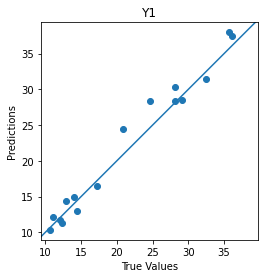

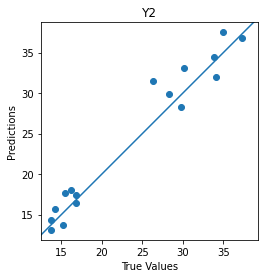

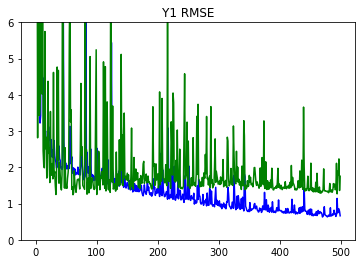

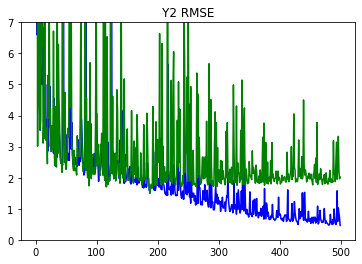

In [69]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_root_mean_squared_error', title='Y2 RMSE', ylim=7)

## Siamese Network

In [71]:
from tensorflow.keras.layers import Flatten, Lambda, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [72]:
from PIL import Image, ImageFont, ImageDraw
import random

In [73]:
from tensorflow.keras.datasets import fashion_mnist


In [79]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [75]:
# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [76]:
# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [78]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

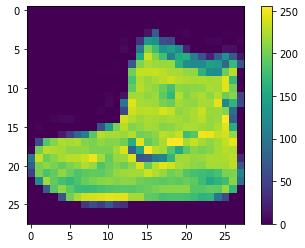

In [94]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [86]:
  digit_indices = [np.where(train_labels== i)[0] for i in range(10)]

In [87]:
digit_indices 

[array([    1,     2,     4, ..., 59974, 59985, 59998]),
 array([   16,    21,    38, ..., 59989, 59991, 59996]),
 array([    5,     7,    27, ..., 59977, 59981, 59993]),
 array([    3,    20,    25, ..., 59971, 59980, 59997]),
 array([   19,    22,    24, ..., 59984, 59986, 59990]),
 array([    8,     9,    12, ..., 59983, 59995, 59999]),
 array([   18,    32,    33, ..., 59973, 59987, 59988]),
 array([    6,    14,    41, ..., 59951, 59979, 59992]),
 array([   23,    35,    57, ..., 59962, 59967, 59994]),
 array([    0,    11,    15, ..., 59932, 59970, 59978])]

In [92]:
n = min([len(digit_indices[d]) for d in range(10)])-1
n

5999

In [95]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
            
    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):
    
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    
    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [96]:
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

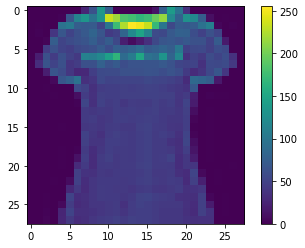

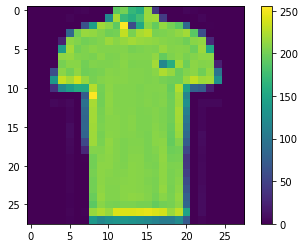

In [97]:
# array index
this_pair = 8

# show images at this index
show_image(ts_pairs[this_pair][0])
show_image(ts_pairs[this_pair][1])

In [98]:
# print the label for this pair
print(tr_y[this_pair])

1.0


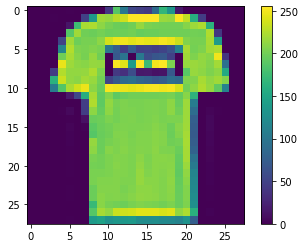

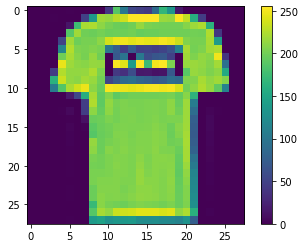

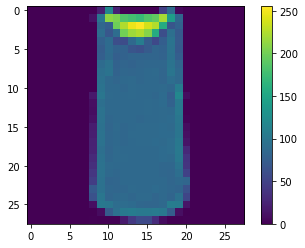

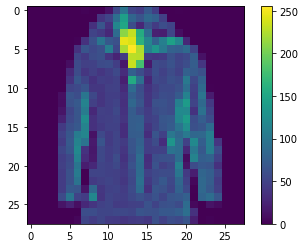

In [99]:
# print other pairs

show_image(tr_pairs[:,0][0])
show_image(tr_pairs[:,0][1])

show_image(tr_pairs[:,1][0])
show_image(tr_pairs[:,1][1])

In [100]:
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    x = Dense(128, activation='relu', name="second_base_dense")(x)
    x = Dropout(0.1, name="second_dropout")(x)
    x = Dense(128, activation='relu', name="third_base_dense")(x)

    return Model(inputs=input, outputs=x)


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [101]:
base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [102]:
# create the left input and point to the base network
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

In [103]:
# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

In [104]:
# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])


In [106]:
# specify the inputs and output of the model
model = Model([input_a, input_b], output)

In [107]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [109]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 332.0255 - val_loss: 0.4807
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2627 - val_loss: 0.2678
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2258 - val_loss: 0.2932
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2099 - val_loss: 0.2716
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2020 - val_loss: 0.2515
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2232 - val_loss: 0.2544
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2095 - val_loss: 0.2519
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2011 - val_loss: 0.2628
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1973 - val_loss: 0.2456
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1991 - val_loss: 0.24

In [108]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() > 0.5
    return np.mean(pred == y_true)

In [110]:
loss = model.evaluate(x=[ts_pairs[:,0],ts_pairs[:,1]], y=ts_y)

y_pred_train = model.predict([tr_pairs[:,0], tr_pairs[:,1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))

625/625 [==============================] - 0s 604us/step - loss: 0.2489
Loss = 0.24887336790561676, Train Accuracy = 0.2476912818803134 Test Accuracy = 0.24974974974974976


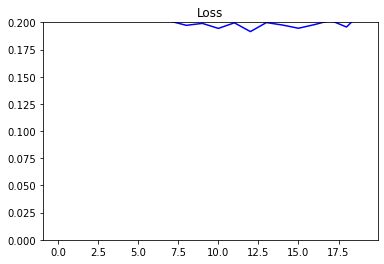

In [111]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

In [112]:
# Matplotlib config
def visualize_images():
    plt.rc('image', cmap='gray_r')
    plt.rc('grid', linewidth=0)
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('ytick', left=False, right=False, labelsize='large')
    plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
    plt.rc('text', color='a8151a')
    plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts

In [113]:
# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)


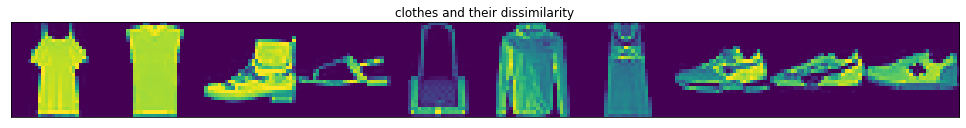

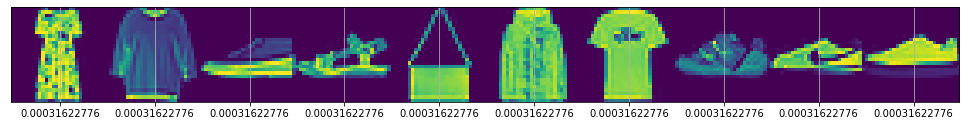

In [114]:
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(tr_pairs[:, 0][indexes], tr_pairs[:, 1][indexes], y_pred_train[indexes], tr_y[indexes], "clothes and their dissimilarity", 10)

# Assignment

In [115]:
import utils_week_one

In [122]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# # load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

In [123]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [125]:
 white_df["is_red"] = np.zeros(len(white_df)).astype(int)

In [126]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [127]:
white_df = white_df.drop_duplicates(keep='first')

In [128]:
utils_week_one.test_white_df(white_df)

 All public tests passed


In [133]:
# # URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# # load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

In [134]:
# # fill the `is_red` column with ones.
red_df["is_red"] = np.ones(len(red_df)).astype(int)

# # keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [135]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [136]:
red_df.shape

(1359, 13)

In [138]:
utils_week_one.test_red_df(red_df)

 All public tests passed


In [139]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [140]:
# NOTE: In a real-world scenario, you should shuffle the data.
# YOU ARE NOT going to do that here because we want to test
# with deterministic data. But if you want the code to do it,
# it's in the commented line below:

#df = df.iloc[np.random.permutation(len(df))]

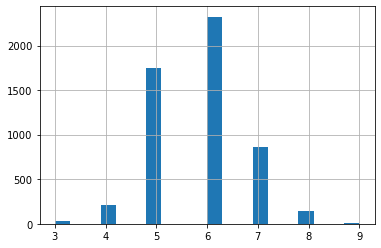

In [141]:
df['quality'].hist(bins=20);

### Imbalanced data (TODO)
You can see from the plot above that the wine quality dataset is imbalanced. 
- Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
- You can do this by removing data belonging to all classes except those > 4 and < 8.

In [142]:

# # get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# # reset index and drop the old one
df = df.reset_index(drop=True)

In [143]:
utils_week_one.test_df_drop(df)

 All public tests passed


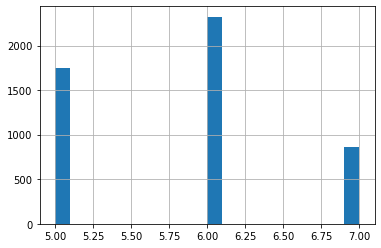

In [144]:
df['quality'].hist(bins=20);

In [145]:
# # split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# # split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [146]:
utils_week_one.test_data_sizes(train.size, test.size, val.size)

 All public tests passed


In [147]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [148]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [149]:
# # format the output of the train set
train_Y = format_output(train)

# # format the output of the val set
val_Y = format_output(val)
    
# # format the output of the test set
test_Y = format_output(test)

In [150]:
utils_week_one.test_format_output(df, train_Y, val_Y, test_Y)

 All public tests passed


In [151]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [152]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [153]:

# # normalize the train set
norm_train_X = norm(train)
    
# # normalize the val set
norm_val_X = norm(val)
    
# # normalize the test set
norm_test_X = norm(test)

In [154]:
utils_week_one.test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test)

 All public tests passed


In [155]:

def base_model(inputs):
    
#     # connect a Dense layer with 128 neurons and a relu activation
     x = Dense(128, activation = 'relu')(inputs)
    
#     # connect another Dense layer with 128 neurons and a relu activation
     x = Dense(128, activation = 'relu')(x)
     return x
utils_week_one.test_base_model(base_model) 

 All public tests passed


In [157]:

len(norm_train_X.columns)

11

In [158]:


def final_model(inputs):
    
#     # get the base model
     x = base_model(inputs)

#     # connect the output Dense layer for regression
     wine_quality = Dense(units='1', name='wine_quality')(x)

#     # connect the output Dense layer for classification. this will use a sigmoid activation.
     wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

#     # define the model using the input and output layers
     model = Model(inputs=[inputs], outputs=[wine_quality,wine_type])

     return model

In [159]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
               loss = {'wine_type' : 'binary_crossentropy',
                       'wine_quality' :'mse'
                      },
               metrics = {'wine_type' : 'accuracy',
                          'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                        }
              )

In [160]:
history = model.fit(norm_train_X, train_Y,
                     epochs = 180, validation_data=(norm_val_X, val_Y))

Epoch 1/180
99/99 [==============================] - 0s 2ms/step - loss: 19.0743 - wine_quality_loss: 18.3515 - wine_type_loss: 0.7228 - wine_quality_root_mean_squared_error: 4.2839 - wine_type_accuracy: 0.3851 - val_loss: 11.6311 - val_wine_quality_loss: 10.9410 - val_wine_type_loss: 0.6900 - val_wine_quality_root_mean_squared_error: 3.3077 - val_wine_type_accuracy: 0.4842
Epoch 2/180
99/99 [==============================] - 0s 1ms/step - loss: 6.8018 - wine_quality_loss: 6.1676 - wine_type_loss: 0.6343 - wine_quality_root_mean_squared_error: 2.4835 - wine_type_accuracy: 0.6063 - val_loss: 3.5568 - val_wine_quality_loss: 3.0011 - val_wine_type_loss: 0.5556 - val_wine_quality_root_mean_squared_error: 1.7324 - val_wine_type_accuracy: 0.8314
Epoch 3/180
99/99 [==============================] - 0s 948us/step - loss: 2.9519 - wine_quality_loss: 2.4907 - wine_type_loss: 0.4612 - wine_quality_root_mean_squared_error: 1.5782 - wine_type_accuracy: 0.9398 - val_loss: 2.4976 - val_wine_quality_l

Epoch 23/180
99/99 [==============================] - 0s 964us/step - loss: 0.6069 - wine_quality_loss: 0.5702 - wine_type_loss: 0.0367 - wine_quality_root_mean_squared_error: 0.7551 - wine_type_accuracy: 0.9933 - val_loss: 0.5932 - val_wine_quality_loss: 0.5551 - val_wine_type_loss: 0.0381 - val_wine_quality_root_mean_squared_error: 0.7450 - val_wine_type_accuracy: 0.9911
Epoch 24/180
99/99 [==============================] - 0s 965us/step - loss: 0.5790 - wine_quality_loss: 0.5431 - wine_type_loss: 0.0359 - wine_quality_root_mean_squared_error: 0.7370 - wine_type_accuracy: 0.9937 - val_loss: 0.5570 - val_wine_quality_loss: 0.5197 - val_wine_type_loss: 0.0373 - val_wine_quality_root_mean_squared_error: 0.7209 - val_wine_type_accuracy: 0.9911
Epoch 25/180
99/99 [==============================] - 0s 970us/step - loss: 0.5524 - wine_quality_loss: 0.5173 - wine_type_loss: 0.0351 - wine_quality_root_mean_squared_error: 0.7192 - wine_type_accuracy: 0.9943 - val_loss: 0.5337 - val_wine_qualit

Epoch 45/180
99/99 [==============================] - 0s 956us/step - loss: 0.3554 - wine_quality_loss: 0.3282 - wine_type_loss: 0.0272 - wine_quality_root_mean_squared_error: 0.5729 - wine_type_accuracy: 0.9952 - val_loss: 0.3565 - val_wine_quality_loss: 0.3254 - val_wine_type_loss: 0.0311 - val_wine_quality_root_mean_squared_error: 0.5704 - val_wine_type_accuracy: 0.9924
Epoch 46/180
99/99 [==============================] - 0s 927us/step - loss: 0.3510 - wine_quality_loss: 0.3240 - wine_type_loss: 0.0270 - wine_quality_root_mean_squared_error: 0.5692 - wine_type_accuracy: 0.9949 - val_loss: 0.3599 - val_wine_quality_loss: 0.3289 - val_wine_type_loss: 0.0310 - val_wine_quality_root_mean_squared_error: 0.5735 - val_wine_type_accuracy: 0.9924
Epoch 47/180
99/99 [==============================] - 0s 912us/step - loss: 0.3498 - wine_quality_loss: 0.3230 - wine_type_loss: 0.0268 - wine_quality_root_mean_squared_error: 0.5683 - wine_type_accuracy: 0.9952 - val_loss: 0.3489 - val_wine_qualit

Epoch 67/180
99/99 [==============================] - 0s 1ms/step - loss: 0.3221 - wine_quality_loss: 0.2988 - wine_type_loss: 0.0233 - wine_quality_root_mean_squared_error: 0.5466 - wine_type_accuracy: 0.9952 - val_loss: 0.3387 - val_wine_quality_loss: 0.3095 - val_wine_type_loss: 0.0292 - val_wine_quality_root_mean_squared_error: 0.5563 - val_wine_type_accuracy: 0.9949
Epoch 68/180
99/99 [==============================] - 0s 899us/step - loss: 0.3206 - wine_quality_loss: 0.2974 - wine_type_loss: 0.0232 - wine_quality_root_mean_squared_error: 0.5454 - wine_type_accuracy: 0.9952 - val_loss: 0.3481 - val_wine_quality_loss: 0.3189 - val_wine_type_loss: 0.0291 - val_wine_quality_root_mean_squared_error: 0.5647 - val_wine_type_accuracy: 0.9949
Epoch 69/180
99/99 [==============================] - 0s 909us/step - loss: 0.3194 - wine_quality_loss: 0.2964 - wine_type_loss: 0.0230 - wine_quality_root_mean_squared_error: 0.5445 - wine_type_accuracy: 0.9952 - val_loss: 0.3444 - val_wine_quality_

Epoch 89/180
99/99 [==============================] - 0s 946us/step - loss: 0.3070 - wine_quality_loss: 0.2863 - wine_type_loss: 0.0206 - wine_quality_root_mean_squared_error: 0.5351 - wine_type_accuracy: 0.9962 - val_loss: 0.3440 - val_wine_quality_loss: 0.3160 - val_wine_type_loss: 0.0281 - val_wine_quality_root_mean_squared_error: 0.5621 - val_wine_type_accuracy: 0.9949
Epoch 90/180
99/99 [==============================] - 0s 997us/step - loss: 0.3072 - wine_quality_loss: 0.2868 - wine_type_loss: 0.0204 - wine_quality_root_mean_squared_error: 0.5355 - wine_type_accuracy: 0.9962 - val_loss: 0.3361 - val_wine_quality_loss: 0.3080 - val_wine_type_loss: 0.0281 - val_wine_quality_root_mean_squared_error: 0.5550 - val_wine_type_accuracy: 0.9949
Epoch 91/180
99/99 [==============================] - 0s 926us/step - loss: 0.3059 - wine_quality_loss: 0.2854 - wine_type_loss: 0.0204 - wine_quality_root_mean_squared_error: 0.5342 - wine_type_accuracy: 0.9962 - val_loss: 0.3401 - val_wine_qualit

Epoch 111/180
99/99 [==============================] - 0s 927us/step - loss: 0.2966 - wine_quality_loss: 0.2782 - wine_type_loss: 0.0184 - wine_quality_root_mean_squared_error: 0.5274 - wine_type_accuracy: 0.9965 - val_loss: 0.3387 - val_wine_quality_loss: 0.3110 - val_wine_type_loss: 0.0277 - val_wine_quality_root_mean_squared_error: 0.5577 - val_wine_type_accuracy: 0.9949
Epoch 112/180
99/99 [==============================] - 0s 928us/step - loss: 0.2954 - wine_quality_loss: 0.2771 - wine_type_loss: 0.0183 - wine_quality_root_mean_squared_error: 0.5264 - wine_type_accuracy: 0.9965 - val_loss: 0.3383 - val_wine_quality_loss: 0.3106 - val_wine_type_loss: 0.0277 - val_wine_quality_root_mean_squared_error: 0.5573 - val_wine_type_accuracy: 0.9949
Epoch 113/180
99/99 [==============================] - 0s 927us/step - loss: 0.2955 - wine_quality_loss: 0.2773 - wine_type_loss: 0.0183 - wine_quality_root_mean_squared_error: 0.5266 - wine_type_accuracy: 0.9962 - val_loss: 0.3310 - val_wine_qua

Epoch 133/180
99/99 [==============================] - 0s 976us/step - loss: 0.2873 - wine_quality_loss: 0.2707 - wine_type_loss: 0.0166 - wine_quality_root_mean_squared_error: 0.5203 - wine_type_accuracy: 0.9965 - val_loss: 0.3342 - val_wine_quality_loss: 0.3065 - val_wine_type_loss: 0.0277 - val_wine_quality_root_mean_squared_error: 0.5536 - val_wine_type_accuracy: 0.9949
Epoch 134/180
99/99 [==============================] - 0s 941us/step - loss: 0.2864 - wine_quality_loss: 0.2698 - wine_type_loss: 0.0165 - wine_quality_root_mean_squared_error: 0.5195 - wine_type_accuracy: 0.9965 - val_loss: 0.3355 - val_wine_quality_loss: 0.3078 - val_wine_type_loss: 0.0278 - val_wine_quality_root_mean_squared_error: 0.5548 - val_wine_type_accuracy: 0.9949
Epoch 135/180
99/99 [==============================] - 0s 925us/step - loss: 0.2853 - wine_quality_loss: 0.2688 - wine_type_loss: 0.0165 - wine_quality_root_mean_squared_error: 0.5184 - wine_type_accuracy: 0.9965 - val_loss: 0.3328 - val_wine_qua

Epoch 155/180
99/99 [==============================] - 0s 918us/step - loss: 0.2764 - wine_quality_loss: 0.2612 - wine_type_loss: 0.0151 - wine_quality_root_mean_squared_error: 0.5111 - wine_type_accuracy: 0.9968 - val_loss: 0.3358 - val_wine_quality_loss: 0.3080 - val_wine_type_loss: 0.0278 - val_wine_quality_root_mean_squared_error: 0.5550 - val_wine_type_accuracy: 0.9949
Epoch 156/180
99/99 [==============================] - 0s 923us/step - loss: 0.2783 - wine_quality_loss: 0.2633 - wine_type_loss: 0.0150 - wine_quality_root_mean_squared_error: 0.5131 - wine_type_accuracy: 0.9968 - val_loss: 0.3348 - val_wine_quality_loss: 0.3071 - val_wine_type_loss: 0.0278 - val_wine_quality_root_mean_squared_error: 0.5541 - val_wine_type_accuracy: 0.9949
Epoch 157/180
99/99 [==============================] - 0s 901us/step - loss: 0.2771 - wine_quality_loss: 0.2621 - wine_type_loss: 0.0150 - wine_quality_root_mean_squared_error: 0.5119 - wine_type_accuracy: 0.9968 - val_loss: 0.3333 - val_wine_qua

Epoch 177/180
99/99 [==============================] - 0s 944us/step - loss: 0.2707 - wine_quality_loss: 0.2569 - wine_type_loss: 0.0137 - wine_quality_root_mean_squared_error: 0.5069 - wine_type_accuracy: 0.9971 - val_loss: 0.3357 - val_wine_quality_loss: 0.3078 - val_wine_type_loss: 0.0280 - val_wine_quality_root_mean_squared_error: 0.5548 - val_wine_type_accuracy: 0.9949
Epoch 178/180
99/99 [==============================] - 0s 935us/step - loss: 0.2707 - wine_quality_loss: 0.2569 - wine_type_loss: 0.0137 - wine_quality_root_mean_squared_error: 0.5069 - wine_type_accuracy: 0.9971 - val_loss: 0.3359 - val_wine_quality_loss: 0.3080 - val_wine_type_loss: 0.0279 - val_wine_quality_root_mean_squared_error: 0.5549 - val_wine_type_accuracy: 0.9949
Epoch 179/180
99/99 [==============================] - 0s 981us/step - loss: 0.2698 - wine_quality_loss: 0.2562 - wine_type_loss: 0.0137 - wine_quality_root_mean_squared_error: 0.5062 - wine_type_accuracy: 0.9971 - val_loss: 0.3428 - val_wine_qua

In [161]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 434us/step - loss: 0.3330 - wine_quality_loss: 0.3049 - wine_type_loss: 0.0281 - wine_quality_root_mean_squared_error: 0.5522 - wine_type_accuracy: 0.9949

loss: 0.3329910635948181
wine_quality_loss: 0.30492180585861206
wine_type_loss: 0.0280692670494318
wine_quality_rmse: 0.552197277545929
wine_type_accuracy: 0.9949302673339844


In [162]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [169]:
from sklearn.metrics import confusion_matrix
import itertools

In [170]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


In [176]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([f'{title}'] + labels)
    ax.set_yticklabels([f'{title}'] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [172]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

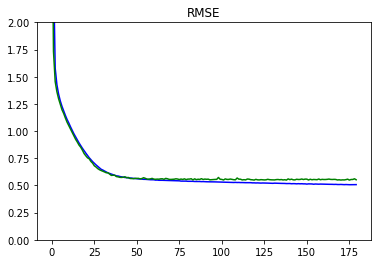

In [173]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

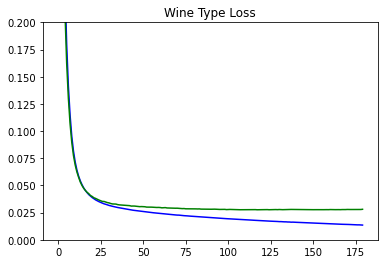

In [174]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

<ipython-input-176-589cf23fbeff>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{title}'] + labels)
<ipython-input-176-589cf23fbeff>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{title}'] + labels)


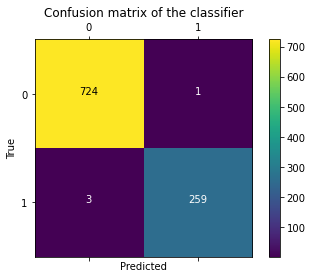

In [177]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])